<img src="https://github.com/danielscarvalho/data/blob/master/img/FIAP-logo.png?raw=True" style="float:right;" width="200px">

# DATA SCIENCE & STATISTICAL COMPUTING [》](https://www.fiap.com.br/)

## Gráficos com matplotlib e numpy

- www.matplotlib.org
- https://matplotlib.org/cheatsheets/ - Matplotlib cheatsheets and handouts
- https://matplotlib.org/stable/tutorials/index.html - Tutorials
- https://matplotlib.org/stable/gallery/index.html - Examples

---

**Exercício 2 (Para entrega)**: Como atividade individual desta aula, escolha um dado do World Bank em https://data.worldbank.org/ e faça análise de forma gráfica. Importar os dados no dataframe Pandas, explicar em markdown o que esta sendo analisado, gerar gráfico com o matplotlib:

- Linha
- Barra
- Histograma
- Pizza
- Scatter

Publicar o notebook (.ipynb) no GitHub e submeter o link em Trabalho do MS Teams da nossa aula.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

## GDP (current US$)
https://data.worldbank.org/indicator/NY.GDP.MKTP.CD

In [2]:
# o .csv veio mal formado, deletei as 4 primeiras linhas e importou
# não só isso, como o layout dele é bizarro
df = pd.read_csv("world bank/API_NY.GDP.MKTP.CD_DS2_en_csv_v2_576313.csv")
df.drop(inplace=True, columns=["Country Code", "Indicator Name", "Indicator Code"])

In [3]:
df.head(5)

,Country Name,1960,1961,1962,1963,1964,1965,1966,1967,1968,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,Unnamed: 68
0,Aruba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.962907e+09,2.983635e+09,3.092429e+09,3.276184e+09,3.395799e+09,2.558906e+09,3.103184e+09,3.544708e+09,NaN,NaN
1,Africa Eastern and Southern,1.847810e+10,1.936631e+10,2.050647e+10,2.224273e+10,2.429433e+10,2.661956e+10,2.873279e+10,3.159296e+10,3.421651e+10,...,9.325135e+11,8.900514e+11,1.028394e+12,1.012521e+12,1.006191e+12,9.288802e+11,1.086531e+12,1.185138e+12,NaN,NaN
2,Afghanistan,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,1.373333e+09,...,1.913422e+10,1.811657e+10,1.875346e+10,1.805322e+10,1.879944e+10,1.995593e+10,1.426650e+10,NaN,NaN,NaN
3,Africa Western and Central,1.041165e+10,1.113592e+10,1.195171e+10,1.268581e+10,1.384900e+10,1.487476e+10,1.584558e+10,1.442849e+10,1.488050e+10,...,7.692632e+11,6.921149e+11,6.856303e+11,7.681582e+11,8.234056e+11,7.869624e+11,8.449275e+11,8.753937e+11,NaN,NaN
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.049642e+10,5.276162e+10,7.369016e+10,7.945069e+10,7.089796e+10,4.850156e+10,6.650513e+10,1.067828e+11,NaN,NaN


In [4]:
# A coluna 2023 está vazia, e há uma coluna chamada "Unnamed: 68" quebrada também
df.drop(inplace=True, columns=["2023", "Unnamed: 68"])

In [5]:
# https://stackoverflow.com/a/28654127
df = df.melt(id_vars=["Country Name"], var_name="Ano", value_name="GDP")
df

,Country Name,Ano,GDP
0,Aruba,1960,NaN
1,Africa Eastern and Southern,1960,1.847810e+10
2,Afghanistan,1960,5.377778e+08
3,Africa Western and Central,1960,1.041165e+10
4,Angola,1960,NaN
...,...,...,...
16753,Kosovo,2022,9.409474e+09
16754,"Yemen, Rep.",2022,NaN
16755,South Africa,2022,4.052709e+11
16756,Zambia,2022,2.916378e+10


In [6]:
df.sort_values(by=["Country Name", "Ano"])

,Country Name,Ano,GDP
2,Afghanistan,1960,5.377778e+08
268,Afghanistan,1961,5.488889e+08
534,Afghanistan,1962,5.466667e+08
800,Afghanistan,1963,7.511112e+08
1066,Afghanistan,1964,8.000000e+08
...,...,...,...
15693,Zimbabwe,2018,3.415607e+10
15959,Zimbabwe,2019,2.183223e+10
16225,Zimbabwe,2020,2.150970e+10
16491,Zimbabwe,2021,2.837124e+10


In [7]:
df.sort_values(by=["GDP"], ascending=False)

,Country Name,Ano,GDP
16751,World,2022,1.008796e+14
16485,World,2021,9.715318e+13
15953,World,2019,8.777740e+13
15687,World,2018,8.654268e+13
16219,World,2020,8.527268e+13
...,...,...,...
16731,Tonga,2022,NaN
16746,"Venezuela, RB",2022,NaN
16747,British Virgin Islands,2022,NaN
16748,Virgin Islands (U.S.),2022,NaN


In [8]:
top_100 = (df
           .groupby("Country Name")
           .aggregate(np.sum)
           .sort_values(by="GDP", ascending=False)
           .head(100))
top_100

,GDP
Country Name,
World,2.044007e+15
High income,1.460565e+15
OECD members,1.440840e+15
Post-demographic dividend,1.371130e+15
Europe & Central Asia,6.316067e+14
...,...
Algeria,4.526136e+12
Viet Nam,4.389106e+12
Romania,4.332965e+12


In [9]:
top_100.sample(5)

,GDP
Country Name,
Middle income,5.664401e+14
Chile,5.735867e+12
United Kingdom,8.276493e+13
Low income,1.147790e+13
Euro area,3.916188e+14


### Gráfico de Linha

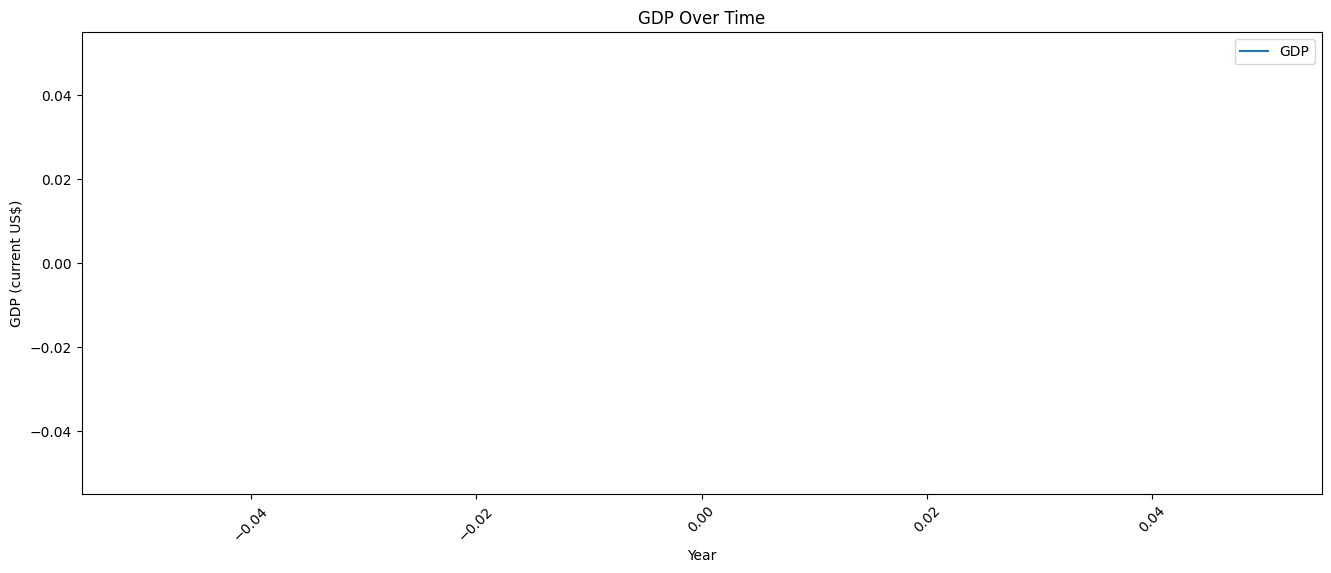

In [10]:
plt.figure(figsize=(16, 6))
for country in top_100.sample(5):
    subset = df[df["Country Name"] == country]
    plt.plot(subset["Ano"], subset["GDP"], label=country)
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.ylabel("GDP (current US$)")
plt.title("GDP Over Time")
plt.legend()
plt.show()